In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import seaborn as sns

## Scaling + PCA + KMeans

In [2]:
df = pd.read_csv("/Users/luisi/Downloads/Data/features_3_sec.csv") 

In [3]:
# Step 1: Features
df_features = df.drop(["label", "filename", "length"], axis = 1)
df_features.head()

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,1.080790e+06,...,-2.853603,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767
1,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,6.722448e+05,...,4.074709,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081
2,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,7.907127e+05,...,4.806280,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122
3,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,9.216524e+05,...,-1.359111,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678
4,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,6.102111e+05,...,2.092937,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694


In [4]:
# Step 2: Feature Scaling
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(df_features), columns = df_features.columns)
X_scaled.head(3)

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,0.355399,0.716757,0.293133,0.107955,0.262173,0.034784,0.459205,0.094130,0.346153,0.083164,...,0.363613,0.056198,0.397172,0.066062,0.371828,0.055344,0.380831,0.026797,0.506746,0.047781
1,0.367322,0.670347,0.253040,0.044447,0.270969,0.018716,0.470831,0.052261,0.363722,0.051694,...,0.468596,0.092912,0.351681,0.074001,0.362068,0.076365,0.418452,0.082414,0.593029,0.065548
2,0.373159,0.728067,0.296753,0.141663,0.265293,0.023073,0.494051,0.059922,0.378215,0.060820,...,0.479681,0.096704,0.420979,0.050639,0.400536,0.067509,0.433742,0.043841,0.546264,0.036062


In [5]:
# Step 3: PCA
pca = PCA()
pca.fit(X_scaled) 

PCA()

In [6]:
pca = PCA(n_components=6) 
df_pca = pca.fit_transform(X_scaled)
pca.explained_variance_ratio_

array([0.26745621, 0.18238003, 0.08093668, 0.05726487, 0.05005109,
       0.03963967])

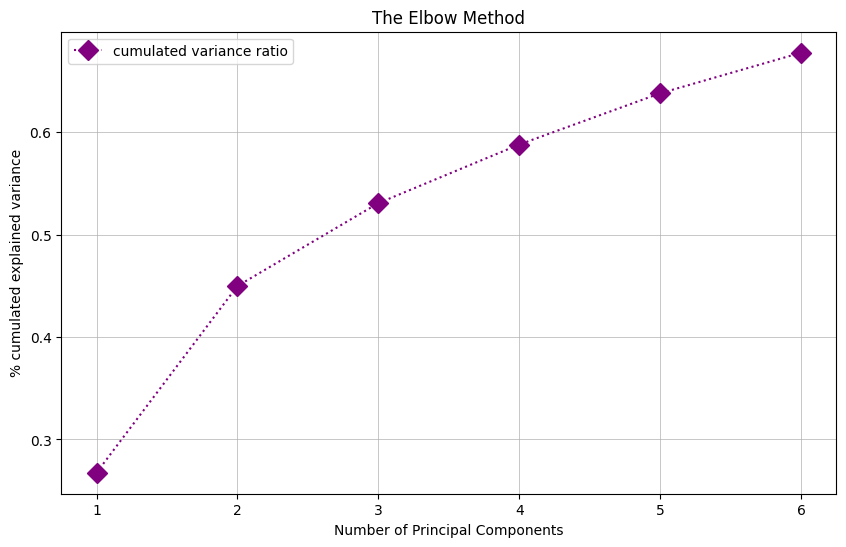

In [7]:
with plt.style.context('fast'):
    # figsize
    plt.figure(figsize=(10,6))
    # getting axes
    ax = plt.gca()
    # plotting
    explained_variance_ratio_cumulated = np.cumsum(pca.explained_variance_ratio_)
    x_axis_ticks = np.arange(1,explained_variance_ratio_cumulated.shape[0]+1)
    ax.plot(x_axis_ticks,explained_variance_ratio_cumulated,label="cumulated variance ratio",color="purple",linestyle=":",marker="D",markersize=10)
    # customizing
    ax.set_xlabel('Number of Principal Components')
    ax.set_ylabel('% cumulated explained variance')
    ax.legend(loc="upper left")
    ax.set_title('The Elbow Method')
    ax.set_xticks(x_axis_ticks)
    ax.grid(axis="x",linewidth=0.5)
    ax.grid(axis="y",linewidth=0.5)

In [8]:
threhsold_pca = 5
pca = PCA(n_components=threhsold_pca, whiten=True)
pca.fit(X_scaled)
klang_proj = pd.DataFrame(pca.transform(X_scaled))
klang_proj 

,0,1,2,3,4
0,-0.599533,0.363200,0.319789,0.250439,0.426077
1,-0.683445,0.690418,0.175455,0.076382,0.041262
2,-0.470443,0.358292,0.303788,0.617104,0.035496
3,-0.689605,0.502735,0.234357,0.413213,0.405946
4,-0.766898,0.563597,0.130836,0.420122,0.590471
...,...,...,...,...,...
9985,-1.181829,0.375921,-0.169879,0.365734,-0.796666
9986,-0.886746,0.673932,0.108575,-0.205055,-0.655791
9987,-0.966057,-0.593264,1.088368,0.405877,-1.269144
9988,-0.768247,1.163718,-0.137430,-0.095375,-0.849354


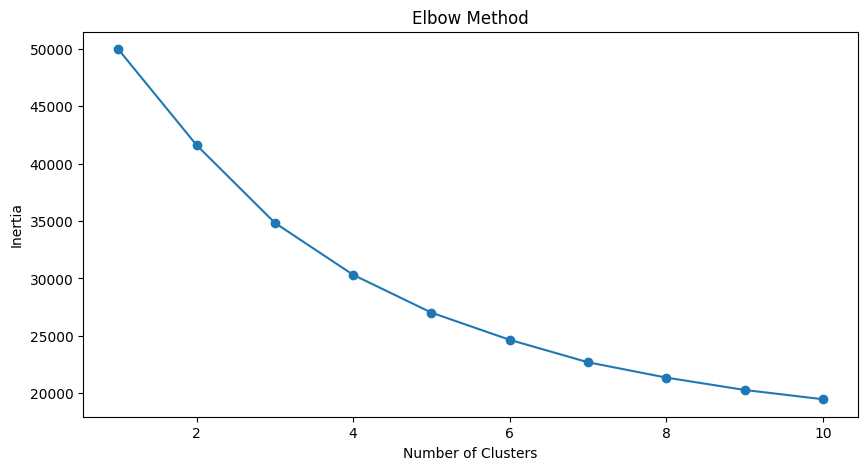

In [9]:
wcss = []
cluster = range(1,11)

for k in cluster:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(klang_proj)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(cluster, wcss, marker = "o")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

In [10]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df["cluster"] = kmeans.fit_predict(klang_proj)

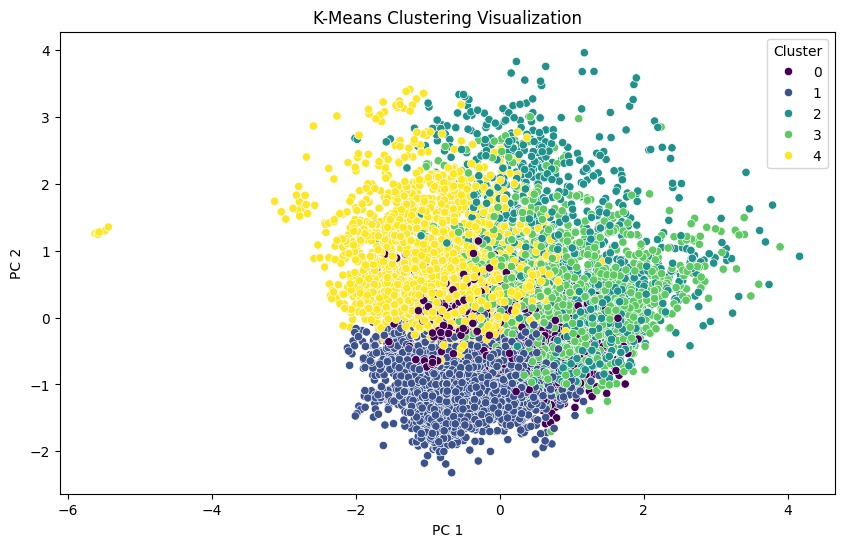

In [11]:
# Step 5: Visualizing Clusters using PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(klang_proj)

df_pca = pd.DataFrame(df_pca, columns=["PC1", "PC2"])
df_pca["cluster"] = df["cluster"]

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_pca["PC1"], y=df_pca["PC2"], hue=df["cluster"], palette="viridis")
plt.title("K-Means Clustering Visualization")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend(title="Cluster")
plt.show()

In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity

# 1. Silhouette Score -> Measures how well-separated clusters are. Values range from -1 to 1 (higher is better).
silhouette_avg = silhouette_score(klang_proj, df["cluster"])
print(f"Silhouette Score: {silhouette_avg: }")

# 2. Cosine Similarity -> Within Clusters Checks if music samples in the same cluster are perceptually similar
cluster_similarities = {}
for cluster in df["cluster"].unique():
    cluster_points = klang_proj[df["cluster"] == cluster]
    if len(cluster_points) > 1:
        similarity_matrix = cosine_similarity(cluster_points)
        avg_similarity = np.mean(similarity_matrix)
        cluster_similarities[cluster] = avg_similarity

print("\nAverage Cosine Similarity Per Cluster:")
for cluster, sim in cluster_similarities.items():
    print(f"Cluster {cluster}: {sim: }")

Silhouette Score:  0.23831159742062702

Average Cosine Similarity Per Cluster:
Cluster 1:  0.4896287628441055
Cluster 3:  0.4712008173137026
Cluster 2:  0.4758536548667318
Cluster 0:  0.5545363201832765
Cluster 4:  0.5109176202262748
